In [1]:
%load_ext pycodestyle_magic
%flake8_on
# permet d'avoir un warning si ne respecte pas pep8

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

In [3]:
customers_df = pd.read_csv('Data/olist_customers_dataset.csv')
geoloc_df = pd.read_csv('Data/olist_geolocation_dataset.csv')
items_df = pd.read_csv('Data/olist_order_items_dataset.csv')
payments_df = pd.read_csv('Data/olist_order_payments_dataset.csv')
reviews_df = pd.read_csv('Data/olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('Data/olist_orders_dataset.csv')
products_df = pd.read_csv('Data/olist_products_dataset.csv')
sellers_df = pd.read_csv('Data/olist_sellers_dataset.csv')
category_df = pd.read_csv('Data/product_category_name_translation.csv')

# Informations Dataset

In [4]:
data = {'customers': customers_df,
        'geolocalisation': geoloc_df,
        'items': items_df,
        'payments': payments_df,
        'reviews': reviews_df,
        'orders': orders_df,
        'products': products_df,
        'sellers': sellers_df,
        'category': category_df}

In [5]:
# Afficher des information sur les datasets

for name, df in data.items():

    rows = df.shape[0]
    cols = df.shape[1]

    print('{} dataframe a {} lignes et {} colonnes '.format(name, rows, cols))
    print(df.columns.tolist())

    for col in df.columns.tolist():

        nul_rows = df[df[col].isna()].shape[0]
        nul_p = round(nul_rows*100/rows, 2)  # pourcentage valleurs nulles

        if nul_rows != 0:

            print('\t{} a {} valeurs nulles({}%)'.format(col, nul_rows, nul_p))

    print('\n')

customers dataframe a 99441 lignes et 5 colonnes 
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


geolocalisation dataframe a 1000163 lignes et 5 colonnes 
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


items dataframe a 112650 lignes et 7 colonnes 
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


payments dataframe a 103886 lignes et 5 colonnes 
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


reviews dataframe a 100000 lignes et 7 colonnes 
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
	review_comment_title a 88285 valeurs nulles(88.28%)
	review_comment_message a 58247 valeurs nulles(58.25%)


orders dataframe a 99441 lignes et 8 colonnes 
['order_id', 'customer_id', 

# Customers


In [6]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
sns.set_style('whitegrid')

font = {'family': 'Candara',
        'weight': 'light',
        'size': 14}

plt.rc('font', **font)

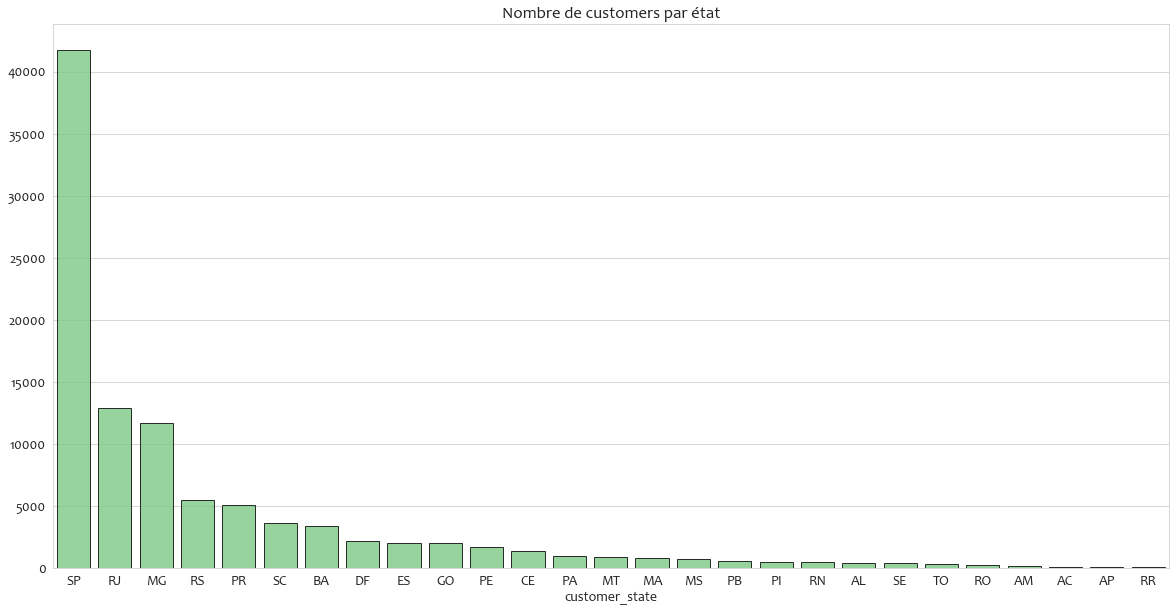

In [8]:
fig = plt.figure(figsize=(20, 10))
ax = sns.countplot(data=customers_df,  x='customer_state',
                   order=customers_df.customer_state.value_counts().index,
                   edgecolor='black', color='#6fd67b', alpha=0.8)
ax.set_ylabel('')
title = plt.title('Nombre de customers par état')

In [9]:
len(customers_df.customer_unique_id.unique())

96096

Il y a en réalité 96 096 clients différents

In [10]:
customers_df.sort_values(by='customer_unique_id', inplace=True)
customers_df.reset_index(drop=True, inplace=True)

In [11]:
# doublons de clients uniques
customers_df[customers_df.duplicated(subset='customer_unique_id', keep=False)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
33,1afe8a9c67eec3516c09a8bdcc539090,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
34,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
107,1b4a75b3478138e99902678254b260f4,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
108,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
126,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055,maceio,AL
...,...,...,...,...,...
99276,d064be88116eb8b958727aec4cf56a59,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
99277,bec0bf00ac5bee64ce8ef5283051a70c,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
99278,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
99394,0088395699ea0fcd459bfbef084997db,ffe254cc039740e17dd15a5305035928,37640,extrema,MG


In [12]:
custom_count = customers_df.drop_duplicates(subset=['customer_unique_id',
                                                    'customer_city',
                                                    'customer_state'])

In [13]:
# recup nombre villes/pays pour un meme client
custom_count = custom_count.groupby('customer_unique_id').count()
print(custom_count.customer_state.unique())
print(custom_count.customer_city.unique())

[1 2 3]
[1 2 3]


Il y a des clients qui ont acheté depuis plusieurs endroits différents.

In [14]:
# regarder ceux qui ont plusieurs pays
state_mult = custom_count[custom_count.customer_state != 1].index
customers_df[customers_df.customer_unique_id.isin(state_mult)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
571,483468a56a54dbbbf8f2b2354cc8a729,0178b244a5c281fb2ade54038dd4b161,12518,guaratingueta,SP
572,ea6ba2b2e27f7efea73bdeab7fd6e4a0,0178b244a5c281fb2ade54038dd4b161,14960,novo horizonte,SP
3546,caded193e8e47b8362864762a83db3c5,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP
3547,ebc513ad3aed97e53c11e0e773c10152,08fb46d35bb3ab4037202c23592d1259,3220,sao paulo,SP
3873,a8876ecd91fd22bc8b420c9a4be69955,09d74edf20acb4f9523fb1cf19a18456,34012,nova lima,MG
...,...,...,...,...,...
98747,15baa4d1c9fd174d26e105980d24aeb9,fe3e52de024b82706717c38c8e183084,72306,brasilia,DF
98748,1e79e4f1a4653e041c3ce1ddb2ff239f,fe3e52de024b82706717c38c8e183084,36420,ouro branco,MG
98790,94c00589c7550e31350908f68e97d488,fe59d5878cd80080edbd29b5a0a4e1cf,71065,guara,DF
98791,edee5737d062e9274e403eff4ad67e12,fe59d5878cd80080edbd29b5a0a4e1cf,71065,guara,DF


In [15]:
geoloc_df[geoloc_df.geolocation_zip_code_prefix == 72036]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


Comme il y a l'air d'avoir des zip coden sans correspondance dans la table geoloc et des villes avec le meme zip code, on regroupera par ville/etat pour obtenir des distances plutot que par zip_code

# Sellers

In [16]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Geoloc

In [17]:
geoloc_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [18]:
# on va recup les coordonnées 'globales' par ville

In [19]:
coord_villes = geoloc_df.groupby(['geolocation_city',
                                  'geolocation_state']).mean()
coord_villes.drop('geolocation_zip_code_prefix', axis=1, inplace=True)

In [20]:
coord_villes

,,geolocation_lat,geolocation_lng
geolocation_city,geolocation_state,,
* cidade,PR,-25.571748,-49.334374
...arraial do cabo,RJ,-22.969370,-42.029834
4o. centenario,PR,-24.271860,-53.069433
4º centenario,PR,-24.279801,-53.074723
abadia de goias,GO,-16.767063,-49.438089
...,...,...,...
áurea,RS,-27.695009,-52.055076
ângulo,PR,-23.195024,-51.917294
érico cardoso,BA,-13.393047,-42.134282


# Items

In [21]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [22]:
# on regarde si il y a plusieurs vendeurs pour une meme commande
items_test = pd.DataFrame(items_df.groupby('order_id')['seller_id'].unique())

In [23]:
items_test['nb_sellers'] = items_test.seller_id.apply(lambda x: len(x))

In [24]:
items_test.nb_sellers.unique()

array([1, 2, 3, 5, 4], dtype=int64)

In [25]:
len(items_df.order_id.unique())

98666

In [26]:
orders_df.shape[0]

99441

99441 > 98666 il y a des commandes dont on ne connait pas le 'contenu'

In [27]:
orders_df[
    ~orders_df.order_id.isin(items_df.order_id.unique())].order_status.unique()

array(['unavailable', 'canceled', 'created', 'shipped', 'invoiced'],
      dtype=object)

In [28]:
# regarder les commandes a plusieurs items
items_df[items_df.duplicated(subset='order_id')]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [29]:
# regarder la "taille" des commandes
items_df.order_item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [30]:
items_commande = items_df.groupby('order_id').max().order_item_id
items_commande_count = items_commande.value_counts(sort=False)
items_commande_count

1     88863
2      7516
3      1322
4       505
5       204
6       198
8         8
7        22
20        2
12        5
10        8
13        1
15        2
11        4
14        2
21        1
9         3
Name: order_item_id, dtype: int64

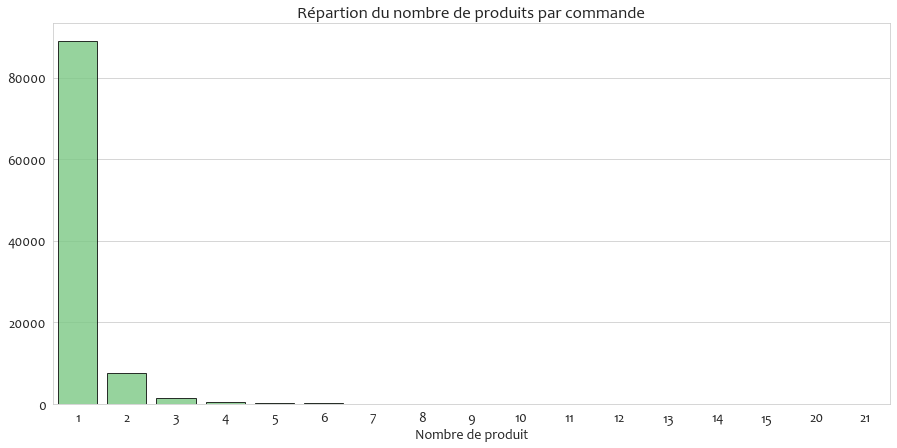

In [31]:
fig = plt.figure(figsize=(15, 7))
ax = sns.barplot(x=items_commande_count.index, y=items_commande_count.values,
                 edgecolor='black', color='#6fd67b', alpha=0.8)
ax.set_xlabel('Nombre de produit')
title = plt.title('Répartion du nombre de produits par commande')

In [32]:
# Quasiment que des commandes a 1,2 produits

# Products

In [33]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [34]:
# En fonction des descriptions ? (dimensions de produit peu utiles ?)

# Category

In [35]:
category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Remplacer categories dans products

In [36]:
# on va traduire les categories grace à la table category

products_df = pd.merge(products_df, category_df,
                       how='left', on='product_category_name')

In [37]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [38]:
notrad = products_df.product_category_name_english.isna()
products_df[products_df.product_category_name.notna() & notrad]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN
17800,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,NaN


In [39]:
# donner une valeur traduite aux produits qui ont en vo et pas en anglais
# pc_gamer -> computers
products_df['product_category_name_english'] = products_df.apply(
    lambda x: 'computers' if x['product_category_name'] == 'pc_gamer'
    else x['product_category_name_english'],
    axis=1)
# 'portateis...' -> robots
products_df['product_category_name_english'] = products_df.apply(
    lambda x: 'kitchen_robot' if x[
        'product_category_name'
    ] == 'portateis_cozinha_e_preparadores_de_alimentos'
    else x['product_category_name_english'],
    axis=1)
# on enleve le nom d'origine
products_df.drop('product_category_name', axis=1, inplace=True)
products_df.rename(
    columns={'product_category_name_english': 'product_category_name'},
    inplace=True)

In [40]:
products_df

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [41]:
def cat_plot():

    plt.figure(figsize=(20, 10))
    cat_count = products_df.product_category_name.value_counts()
    ax = sns.countplot(data=products_df,  x='product_category_name',
                       order=cat_count.index,
                       edgecolor='black', color='#6fd67b', alpha=0.7)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.title('Nombre de produits par catégories')

    pass

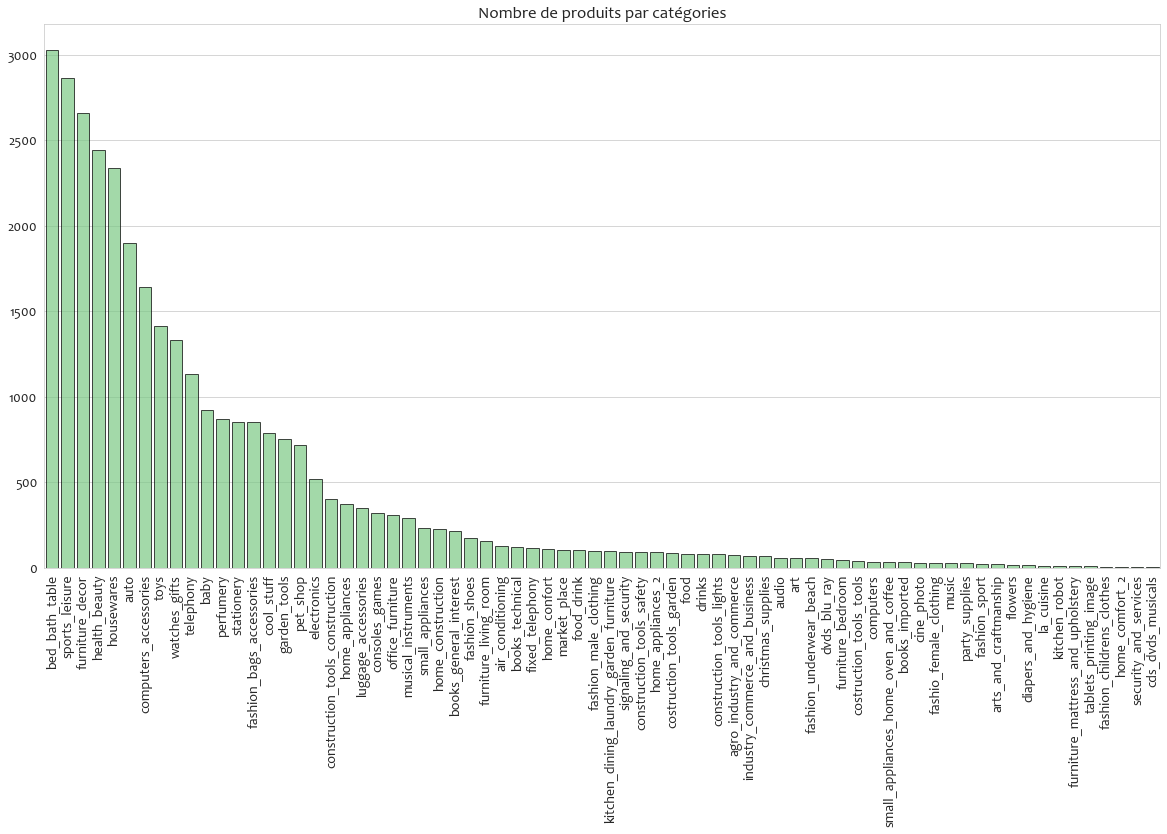

In [42]:
cat_plot()

In [43]:
# regrouper avec moins de categories ?

In [44]:
def regroup_cat(new_word, list_to_replace):

    # remplacer les categories de la liste par le new_world
    products_df['product_category_name'] = products_df[
        'product_category_name'].apply(
        lambda x: new_word if x in list_to_replace else x)

    pass

In [45]:
regroup_cat('construction', ['construction_tools_construction',
                             'home_construction',
                             'construction_tools_safety',
                             'costruction_tools_garden',
                             'construction_tools_lights',
                             'costruction_tools_tools',
                             'garden_tools'])

regroup_cat('fashion_clothing_accessories', ['fashion_bags_accessories',
                                             'luggage_accessories',
                                             'fashion_shoes',
                                             'fashion_male_clothing',
                                             'fashion_underwear_beach',
                                             'fashio_female_clothing',
                                             'fashion_childrens_clothes',
                                             'watches_gifts'])

regroup_cat('health_beauty', ['perfumery'])

regroup_cat('home_furniture', ['bed_bath_table',
                               'furniture_decor',
                               'housewares',
                               'home_appliances',
                               'small_appliances',
                               'furniture_living_room',
                               'home_confort',
                               'kitchen_dining_laundry_garden_furniture',
                               'home_appliances_2',
                               'furniture_bedroom',
                               'small_appliances_home_oven_and_coffee',
                               'la_cuisine',
                               'kitchen_robot',
                               'furniture_mattress_and_upholstery',
                               'home_comfort_2'])

regroup_cat('electronics', ['computers_accessories',
                            'telephony',
                            'consoles_games',
                            'fixed_telephony',
                            'computers',
                            'tablets_printing_image'])

regroup_cat('culture_books_multimedia', ['books_general_interest',
                                         'books_technical',
                                         'dvds_blu_ray',
                                         'books_imported',
                                         'cds_dvds_musicals',
                                         'cine_photo',
                                         'music',
                                         'musical_instruments',
                                         'audio',
                                         'art'])

regroup_cat('sport', ['sports_leisure',
                      'fashion_sport'])

regroup_cat('food_drinks', ['food_drink',
                            'food',
                            'drinks'])

regroup_cat('other', ['stationery',
                      'cool_stuff',
                      'pet_shop',
                      'office_furniture',
                      'air_conditioning',
                      'market_place',
                      'signaling_and_security',
                      'agro_industry_and_commerce',
                      'industry_commerce_and_business',
                      'security_and_services',
                      'christmas_supplies',
                      'party_supplies',
                      'arts_and_craftmanship',
                      'flowers'])

regroup_cat('toys_and_baby', ['toys',
                              'baby',
                              'diapers_and_hygiene'])

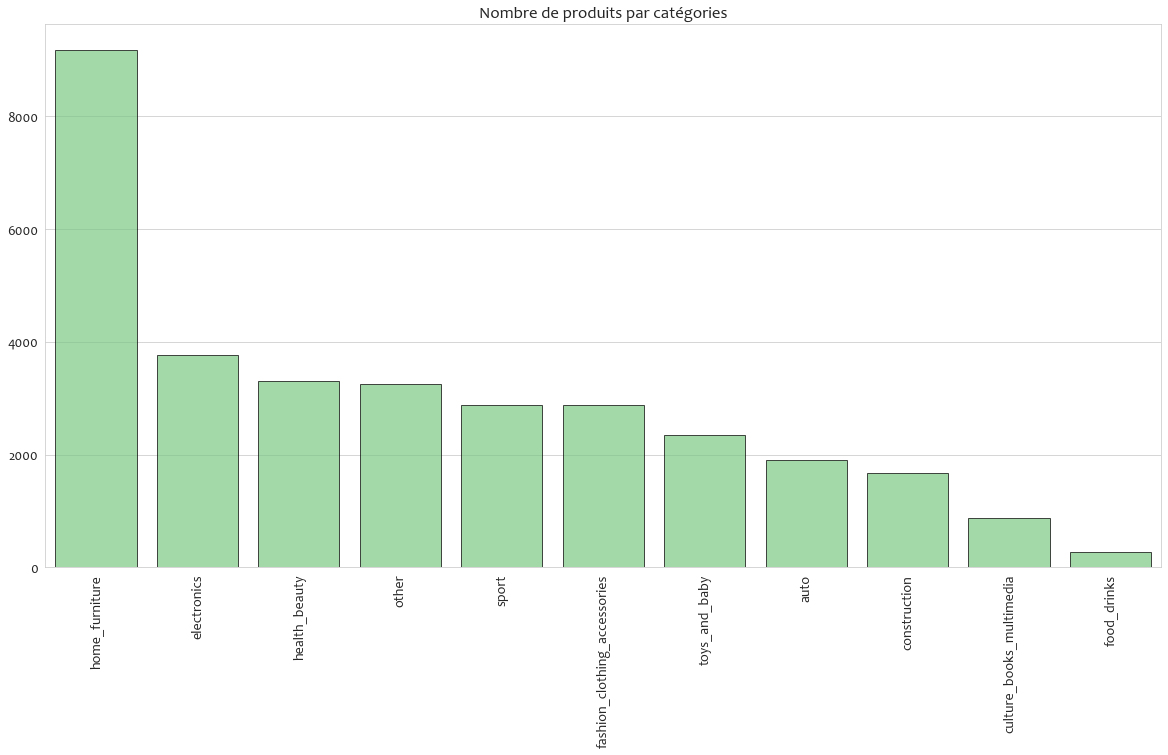

In [46]:
cat_plot()

# Payements

In [47]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [48]:
payments_df[payments_df.duplicated(subset='order_id')]
# on regarde si il y a plusieurs payments pour une meme commande

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


Il y a des payements en plusieurs types différents pour une même commande, afin de regarder le prix total des commandes nous allons aggréger selon l'order_id.

In [49]:
payments_orders = payments_df.groupby('order_id').sum()
payments_orders.drop(['payment_sequential', 'payment_installments'],
                     axis=1, inplace=True)
payments_orders

,payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...
fffc94f6ce00a00581880bf54a75a037,343.40
fffcd46ef2263f404302a634eb57f7eb,386.53
fffce4705a9662cd70adb13d4a31832d,116.85


On peut aussi regarder les types de payments

In [50]:
payments_df.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [51]:
# récupérer la liste des types de paiement
payments_type = pd.DataFrame(
    payments_df.groupby('order_id')['payment_type'].unique())
# regarder le nombre de types de paiement
payments_type['nb_payment_type'] = payments_type.payment_type.apply(
    lambda x: len(x))
payments_type.head()

,payment_type,nb_payment_type
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,[credit_card],1
00018f77f2f0320c557190d7a144bdd3,[credit_card],1
000229ec398224ef6ca0657da4fc703e,[credit_card],1
00024acbcdf0a6daa1e931b038114c75,[credit_card],1
00042b26cf59d7ce69dfabb4e55b4fd9,[credit_card],1


In [52]:
# convertir en binaire par type
for pay in payments_df.payment_type.unique():

    payments_type[pay] = payments_type.payment_type.apply(
        lambda x: 1 if pay in x else 0)

In [53]:
payments_type.head()

,payment_type,nb_payment_type,credit_card,boleto,voucher,debit_card,not_defined
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,[credit_card],1,1,0,0,0,0
00018f77f2f0320c557190d7a144bdd3,[credit_card],1,1,0,0,0,0
000229ec398224ef6ca0657da4fc703e,[credit_card],1,1,0,0,0,0
00024acbcdf0a6daa1e931b038114c75,[credit_card],1,1,0,0,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,[credit_card],1,1,0,0,0,0


On peut aussi regarder l'étalement des paiements.

In [54]:
payment_install = payments_df.copy()
payment_install['pay_plus_fois'] = payment_install.payment_installments.apply(
    lambda x: 1 if x > 1 else 0)

In [55]:
payment_install = payment_install.groupby('order_id').max()
# savoir si il y a eu un paiement en plusieurs fois sur la commande
payment_install = pd.DataFrame(payment_install['pay_plus_fois'])

In [56]:
payment_install.head()

,pay_plus_fois
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
00018f77f2f0320c557190d7a144bdd3,1
000229ec398224ef6ca0657da4fc703e,1
00024acbcdf0a6daa1e931b038114c75,1
00042b26cf59d7ce69dfabb4e55b4fd9,1


# Reviews

In [57]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [58]:
# regarder les doublons d'avis par commande
reviews_df[reviews_df.duplicated(subset='order_id')]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1128,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3127,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8164,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9128,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9868,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
99762,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99883,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99939,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99953,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


In [59]:
reviews_df.sort_values(by=['order_id', 'review_creation_date'], inplace=True)
# reorganisation pour ordonner par commande puis par date de review

In [60]:
recent_reviews = reviews_df.drop_duplicates(subset='order_id', keep='last')
# enlever doublons sur commande sauf derniere review

recent_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52372,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
28025,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
4244,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
39133,f4028d019cb58564807486a6aaf33817,00024acbcdf0a6daa1e931b038114c75,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
56106,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


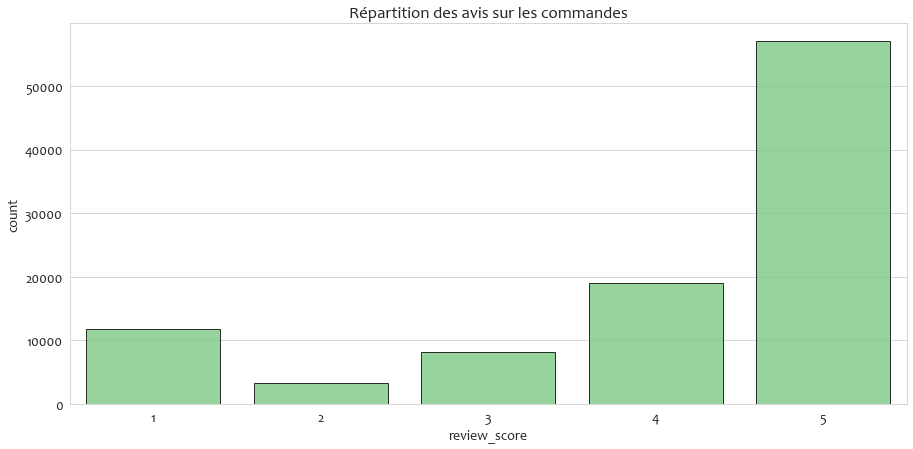

In [61]:
fig = plt.figure(figsize=(15, 7))
ax = sns.countplot(data=recent_reviews, x='review_score',
                   order=[1, 2, 3, 4, 5],
                   edgecolor='black', color='#6fd67b', alpha=0.8)
title = plt.title('Répartition des avis sur les commandes')

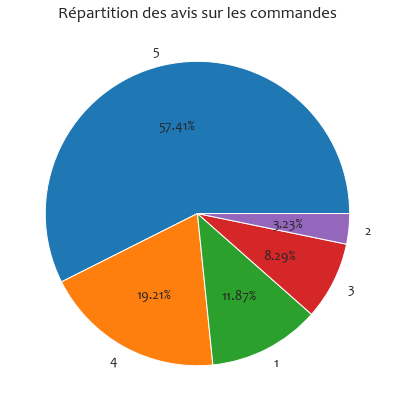

In [62]:
fig = plt.figure(figsize=(15, 7))
ax = plt.pie(x=recent_reviews.review_score.value_counts(), autopct='%.2f%%',
             labels=recent_reviews.review_score.value_counts().index)
title = plt.title('Répartition des avis sur les commandes')

In [63]:
# regarder les avis avec message ou titre
reviews_df[(reviews_df.review_comment_message.notna()) |
           (reviews_df.review_comment_title.notna())]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52372,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
4244,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
56106,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
68349,67b1ab8f3ec19d5a90f153f21757d3a1,0005a1a1728c9d785b8e2b08b904576c,1,NaN,Na descrição do produto quando fui efetuar a c...,2018-03-30 00:00:00,2018-04-02 00:52:01
24922,7e92c32ae297ef950ee69781d9f1760c,00061f2a7bc09da83e415a52dc8a4af1,5,NaN,A caixa do produto veio com uma pequena avaria...,2018-03-30 00:00:00,2018-03-30 04:04:56
...,...,...,...,...,...,...,...
39711,45f17d4d646ab56632c51159f06a5b14,ffec1a6d35149778ec575d5048d44db8,4,NaN,"Amo comprar no baratheon, sempre recebemos os ...",2018-03-29 00:00:00,2018-04-02 12:37:00
86741,49c3df0bcbf2d73e888164aa215e55a4,ffeeb911d070bea3dd20bd5fd01da5e8,5,NaN,Adorei o produto ótimo e recomendo.,2017-10-26 00:00:00,2017-10-27 19:32:58
9379,2b97d83f7c2b3a3b4285174e77379fbc,fff8287bbae429a99bb7e8c21d151c41,5,NaN,Tudo ok,2018-04-08 00:00:00,2018-04-12 20:25:15
14631,8d5c94767f299be3d6f88fd407377fa8,fffb0b1a50e65c449020434fa835e078,1,NaN,A compra foi feita Há mais de um mes e ainda n...,2017-05-17 00:00:00,2017-05-17 12:51:43


In [64]:
# associer les notes aux commandes et faire la moyenne des notes des vendeurs
# possible? commandes peut etre avec plusieurs vendeurs differents ?
# Achat aux vendeurs en fonction des notes ?
# Regarder pdts achetés, commandes bien notées?

# Orders

In [65]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [66]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [67]:
orders_df = orders_df.astype({'order_purchase_timestamp': 'datetime64[ns]'})

In [68]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


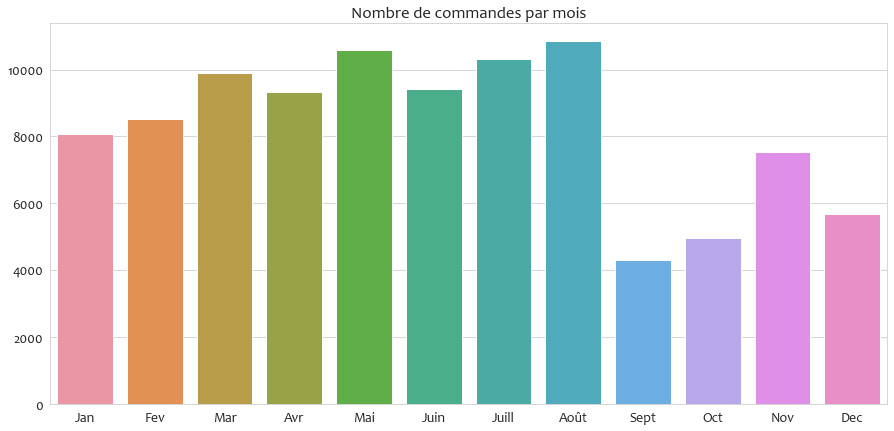

In [69]:
fig = plt.figure(figsize=(15, 7))
ax = sns.countplot(x=orders_df.order_purchase_timestamp.dt.month,
                   order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(['Jan', 'Fev', 'Mar',
                    'Avr', 'Mai', 'Juin',
                    'Juill', 'Août', 'Sept',
                    'Oct', 'Nov', 'Dec'])
plt.xlabel('')
plt.ylabel('')
title = plt.title('Nombre de commandes par mois')

In [70]:
orders_df.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [71]:
# recup mois et année des commandes
orders_df['year'] = orders_df.order_purchase_timestamp.apply(lambda x: x.year)
orders_df['month'] = orders_df.order_purchase_timestamp.apply(
    lambda x: x.month)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2


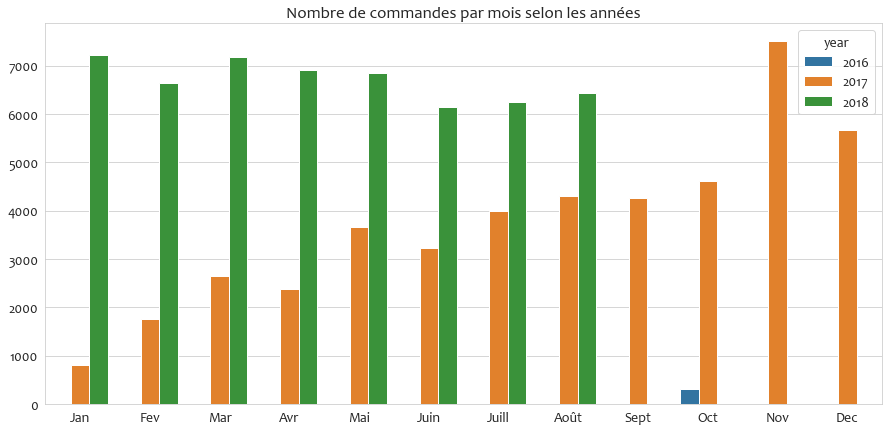

In [72]:
fig = plt.figure(figsize=(15, 7))
ax = sns.countplot(data=orders_df[orders_df.order_status != 'canceled'],
                   x='month', hue='year')
ax.set_xticklabels(['Jan', 'Fev', 'Mar',
                    'Avr', 'Mai', 'Juin',
                    'Juill', 'Août', 'Sept',
                    'Oct', 'Nov', 'Dec'])
plt.xlabel('')
plt.ylabel('')
title = plt.title('Nombre de commandes par mois selon les années')

Il y a l'air d'vaoir un pic en Novembre. On va s'intéresser à ce mois afin de vérifier si le pic est à l'échelle du mois ou s'il est plus concentré sur certains jours.

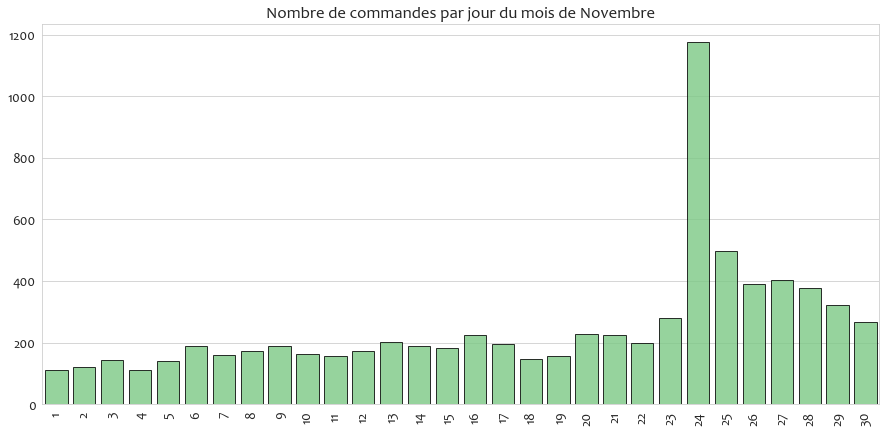

In [73]:
fig = plt.figure(figsize=(15, 7))
ax = sns.countplot(x=orders_df[
    (orders_df.order_status != 'canceled') &  # ignorer canceled
    (orders_df.month == 11)].order_purchase_timestamp.dt.day,
                   order=np.arange(1, 31),
                   edgecolor='black', color='#6fd67b', alpha=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('')
plt.ylabel('')
title = plt.title('Nombre de commandes par jour du mois de Novembre')

Le pic est concentré sur le 24 Novembre ce qui correspond au BlackFriday de cette an, nous allons afficher le nombre de commandes par jour sur l'ensemble des données afin de voir si il y a d'autres pics de ce style lors d'autres mois.

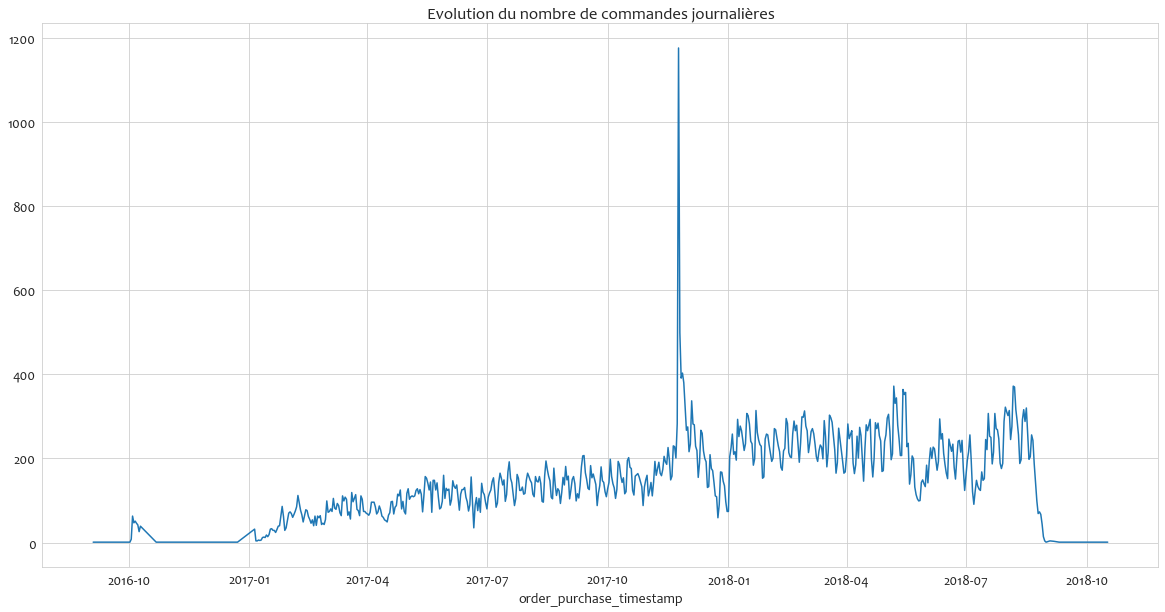

In [74]:
df1 = orders_df.groupby(orders_df.order_purchase_timestamp.dt.date).count()
fig = plt.figure(figsize=(20, 10))
ax = sns.lineplot(x=df1.index, y=df1.order_id.values)
title = plt.title('Evolution du nombre de commandes journalières')

## ajouter informations customers

In [75]:
orders_customers = pd.merge(orders_df, customers_df,
                            how='left', on='customer_id')
# comme on a recup le customer_unique_id on peut s'affranchir du customer_id
orders_customers.drop('customer_id', axis=1, inplace=True)

In [76]:
orders_customers.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


## Nombre de commandes par client

In [77]:
orders_count = orders_customers[['order_id', 'customer_unique_id']].copy()

In [78]:
orders_count = orders_count.groupby('customer_unique_id').count()
orders_count.rename(columns={'order_id': 'nb_commandes'}, inplace=True)

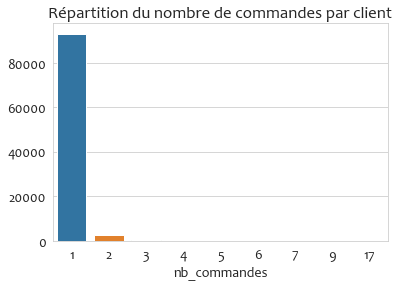

In [79]:
sns.countplot(x=orders_count.nb_commandes)
plt.ylabel('')
title = plt.title('Répartition du nombre de commandes par client')

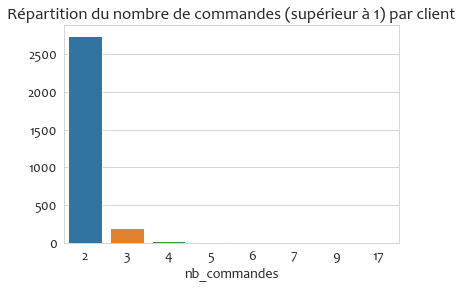

In [80]:
sns.countplot(x=orders_count[orders_count.nb_commandes > 1].nb_commandes)
plt.ylabel('')
title = plt.title(
    'Répartition du nombre de commandes (supérieur à 1) par client')

### Délai entre commandes (pertinance ??)

In [81]:
orders_delay = orders_customers[['order_id',
                                 'order_purchase_timestamp',
                                 'customer_unique_id']].copy()

In [82]:
orders_delay.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'],
                         inplace=True)
# ordonner par client puis par date de commande

orders_delay.reset_index(drop=True, inplace=True)

In [83]:
orders_delay['previous'] = orders_delay.groupby(
    by='customer_unique_id')['order_purchase_timestamp'].shift()
# récupérer la valeur précédente pour la variable [] apres avoir groupé par ()

In [84]:
type(orders_delay.previous[0])

pandas._libs.tslibs.nattype.NaTType

In [85]:
orders_delay['delay'] = orders_delay.apply(
    lambda x: x['order_purchase_timestamp'].date() -
    x['previous'].date() if type(x['previous']) !=
    pd._libs.tslibs.nattype.NaTType
    else x['previous'], axis=1)

In [86]:
orders_delay.head()

,order_id,order_purchase_timestamp,customer_unique_id,previous,delay
0,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,0000366f3b9a7992bf8c76cfdf3221e2,NaT,NaT
1,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,0000b849f77a49e4a4ce2b2a4ca5be3f,NaT,NaT
2,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,0000f46a3911fa3c0805444483337064,NaT,NaT
3,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,0000f6ccb0745a6a4b88665a16c9f078,NaT,NaT
4,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,0004aac84e0df4da2b147fca70cf8255,NaT,NaT


In [87]:
orders_delay[orders_delay.duplicated(subset='customer_unique_id')]

,order_id,order_purchase_timestamp,customer_unique_id,previous,delay
34,c306eca42d32507b970739b5b6a5a33a,2018-08-13 09:14:07,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,16 days
108,08204559bebd39e09ee52dcb56d8faa2,2018-01-14 07:36:54,004288347e5e88a27ded2bb23747066c,2017-07-27 14:13:03,171 days
127,9392c5e72885ad5aba87e6223ca9838d,2018-05-26 19:42:48,004b45ec5c64187465168251cd1c9c2f,2017-09-01 12:11:23,267 days
148,81a93b2fa39e104b865b2bc471c16008,2018-03-22 18:09:41,0058f300f57d7b93c477a131a59b36c3,2018-02-19 17:11:34,31 days
254,cea3e6c11eb60acb9d8d4d51694832f8,2018-06-03 10:12:57,00a39521eb40f7012db50455bf083460,2018-05-23 20:14:21,11 days
...,...,...,...,...,...
99151,c087855fe6f303205c09558f7f8103c8,2017-05-19 21:20:54,ff44401d0d8f5b9c54a47374eb48c1b8,2017-05-19 21:20:54,0 days
99258,1c308eca3f339414a92e518e2a2e5ee9,2017-11-26 23:25:43,ff8892f7c26aa0446da53d01b18df463,2017-05-24 16:09:14,186 days
99277,5f79e2da24a52e76bc22897df03a7901,2017-08-23 13:15:29,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-02-22 12:26:42,182 days
99278,6be1646fccbb69d34b22da3b1807d51d,2017-09-14 14:24:04,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-08-23 13:15:29,22 days


In [88]:
orders_delay[(orders_delay.duplicated(subset='customer_unique_id')) &
             (orders_delay.delay == '0 days')]

,order_id,order_purchase_timestamp,customer_unique_id,previous,delay
318,d61b915b69851aec8a8865f36cfd793e,2017-03-21 19:25:23,00cc12a6d8b578b8ebd21ea4e2ae8b27,2017-03-21 19:25:22,0 days
651,7f40591eeef659da2bc93d2735fa9476,2018-01-22 23:27:48,01a22e2079ea71e17313b88e5811e54a,2018-01-22 22:45:49,0 days
745,6cd2700e3e9fc015e3bbe4ee264af57b,2018-02-09 17:36:45,01ea7dfdac01a4e8fbe2902b73510b20,2018-02-09 17:36:42,0 days
935,b2fc720676930e0f9f3c1e472e8cddad,2017-10-17 11:28:18,027803eb28cc01fbdf5da72b109fabee,2017-10-17 11:28:05,0 days
1019,62ec63f37c8ed14ce3dba43a02721f5e,2018-03-19 20:50:39,02b20b7c813efede140142ac610e36dc,2018-03-19 20:50:39,0 days
...,...,...,...,...,...
98725,843be4a0dcdb9716de7652d53af4acab,2017-07-18 09:57:34,fe28d443ab89dc67f5858bc2beda299a,2017-07-18 09:57:34,0 days
98807,3e677665a6566b610e6f1344ade7b146,2017-11-20 12:47:30,fe613188d4d20ea3e3dc1290549c3ad1,2017-11-20 11:45:42,0 days
98971,02b0bf9164ac7753f9880e46dba17f6c,2017-06-17 17:04:31,fed2005ccab4fcf1a40ebdaff032a148,2017-06-17 17:04:27,0 days
99151,c087855fe6f303205c09558f7f8103c8,2017-05-19 21:20:54,ff44401d0d8f5b9c54a47374eb48c1b8,2017-05-19 21:20:54,0 days


In [89]:
orders_delay[orders_delay.customer_unique_id ==
             '00cc12a6d8b578b8ebd21ea4e2ae8b27']

,order_id,order_purchase_timestamp,customer_unique_id,previous,delay
317,64307ceb91666760cf3ff463618302fd,2017-03-21 19:25:22,00cc12a6d8b578b8ebd21ea4e2ae8b27,NaT,NaT
318,d61b915b69851aec8a8865f36cfd793e,2017-03-21 19:25:23,00cc12a6d8b578b8ebd21ea4e2ae8b27,2017-03-21 19:25:22,0 days


In [90]:
items_df[items_df.order_id == '64307ceb91666760cf3ff463618302fd']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
44076,64307ceb91666760cf3ff463618302fd,1,60d49071f68566b7254c39a7d4ea5c1c,d66c305afaec317ebee552073a674429,2017-03-27 19:25:22,29.9,14.52


In [91]:
items_df[items_df.order_id == 'd61b915b69851aec8a8865f36cfd793e']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
94424,d61b915b69851aec8a8865f36cfd793e,1,48ee9be392f28ae3a64518a070f4d06a,4a3ca9315b744ce9f8e9374361493884,2017-03-27 19:25:23,69.9,11.88


In [92]:
orders_delay['delay'] = orders_delay.delay.dt.days
# convertir le delay en nb jour en int plutot que timedelta

In [93]:
orders_delay['delay'] = orders_delay.delay.apply(
    lambda x: np.nan if x == 0 else x)
# mettre qunad les commandes ont eu lieu en meme temps en nan
# pour que ca n'influe pas sur la moyenne

In [94]:
delais = orders_delay.groupby('customer_unique_id').mean()

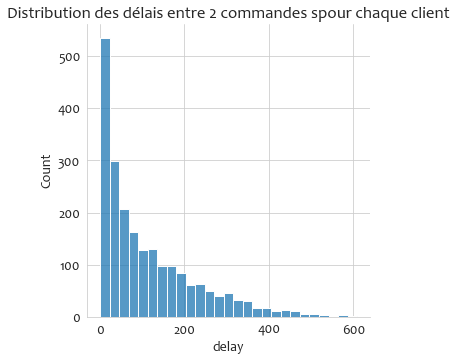

In [95]:
sns.displot(data=delais, x='delay')
title = plt.title(
    'Distribution des délais entre 2 commandes spour chaque client')

In [96]:
delais.fillna(0, inplace=True)
# remettre les nan à 0

### Commande au black Friday ?

In [97]:
orders_customers.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [98]:
orders_bf = orders_customers[['order_id',
                              'order_purchase_timestamp',
                              'customer_unique_id',
                              'month']].copy()

In [99]:
orders_bf['day'] = orders_bf.order_purchase_timestamp.dt.day

In [100]:
orders_bf.head()

,order_id,order_purchase_timestamp,customer_unique_id,month,day
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,10,2
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,7,24
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,8,8
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,11,18
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,2,13


In [101]:
# binariser si achat au bf
orders_bf['bfriday'] = orders_bf.apply(
    lambda x: 1 if ((x['month'] == 11) & (x['day'] == 24)) else 0, axis=1)

In [102]:
orders_bf = orders_bf.groupby('customer_unique_id').max()
orders_bf = orders_bf['bfriday']

## Commandes annulées

In [103]:
orders_customers.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [104]:
orders_cancel = orders_customers[['order_id',
                                  'order_status',
                                  'customer_unique_id']].copy()

In [105]:
orders_cancel['mean_canceled'] = orders_cancel.order_status.apply(
    lambda x: 1 if x == 'canceled' else 0)

In [106]:
orders_cancel = orders_cancel.groupby('customer_unique_id').mean()
orders_cancel.head()

,mean_canceled
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0
0000f46a3911fa3c0805444483337064,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0
0004aac84e0df4da2b147fca70cf8255,0.0


## Ajout information de payement

In [107]:
orders_payments = pd.merge(orders_customers, payments_orders,
                           how='left', on='order_id')

In [108]:
orders_payments.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,28.62


### Montant moyen des commandes par clients

In [109]:
customer_mean = orders_payments.groupby(by='customer_unique_id').mean()
customer_mean.head()

,year,month,customer_zip_code_prefix,payment_value
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018.0,5.0,7787.0,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,2018.0,5.0,6053.0,27.19
0000f46a3911fa3c0805444483337064,2017.0,3.0,88115.0,86.22
0000f6ccb0745a6a4b88665a16c9f078,2017.0,10.0,66812.0,43.62
0004aac84e0df4da2b147fca70cf8255,2017.0,11.0,18040.0,196.89


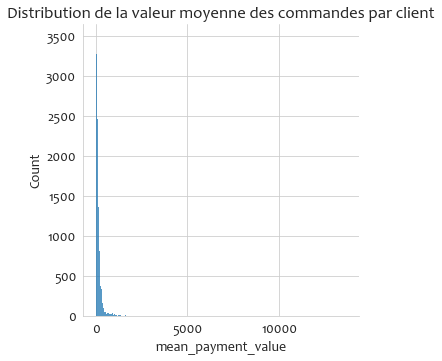

In [110]:
customer_mean.drop(['year', 'month', 'customer_zip_code_prefix'],
                   axis=1, inplace=True)
customer_mean.rename(columns={'payment_value': 'mean_payment_value'},
                     inplace=True)

sns.displot(data=customer_mean, x='mean_payment_value')
title = plt.title('Distribution de la valeur moyenne des commandes par client')

In [111]:
customer_mean.mean_payment_value.describe()

count    96095.000000
mean       161.401796
std        222.308078
min          0.000000
25%         62.460000
50%        105.830000
75%        177.210000
max      13664.080000
Name: mean_payment_value, dtype: float64

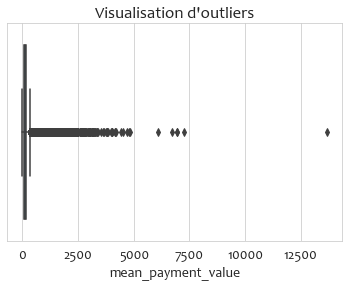

In [112]:
sns.boxplot(data=customer_mean, x='mean_payment_value')
title = plt.title('Visualisation d\'outliers')

In [113]:
customer_mean[customer_mean.mean_payment_value > 5000]

,mean_payment_value
customer_unique_id,
0a0a92112bd4c708ca5fde585afaa872,13664.08
4007669dec559734d6f53e029e360987,6081.54
459bef486812aa25204be022145caa62,6922.21
763c8b1c9c68a0229c42c9fc6f662b93,7274.88
dc4802a71eae9be1dd28f5d788ceb526,6929.31
ff4159b92c40ebe40454e3e6a7c35ed6,6726.66


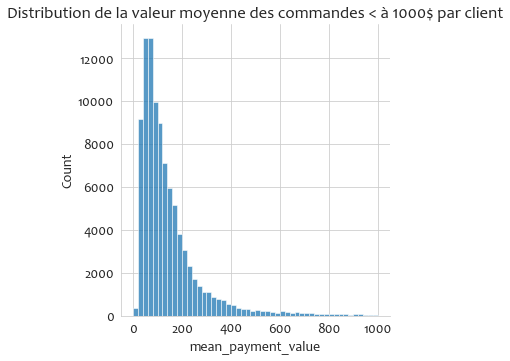

In [114]:
sns.displot(data=customer_mean[customer_mean.mean_payment_value < 1000],
            x='mean_payment_value', bins=50)
title = plt.title(
    'Distribution de la valeur moyenne des commandes < à 1000$ par client')

### Type de payment ?

In [115]:
orders_customers.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [116]:
payments_type.head()

,payment_type,nb_payment_type,credit_card,boleto,voucher,debit_card,not_defined
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,[credit_card],1,1,0,0,0,0
00018f77f2f0320c557190d7a144bdd3,[credit_card],1,1,0,0,0,0
000229ec398224ef6ca0657da4fc703e,[credit_card],1,1,0,0,0,0
00024acbcdf0a6daa1e931b038114c75,[credit_card],1,1,0,0,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,[credit_card],1,1,0,0,0,0


In [117]:
cust_payments_type = pd.merge(orders_customers, payments_type,
                              how='left', on='order_id')

In [118]:
mean_payments_type = cust_payments_type.groupby('customer_unique_id').mean()
mean_payments_type.rename(columns={'nb_payment_type': 'mean_nb_payment_type'},
                          inplace=True)
mean_nb_payments_type = mean_payments_type['mean_nb_payment_type']

In [119]:
nb_payments_type = cust_payments_type.groupby('customer_unique_id').sum()
nb_payments_type.drop(['year', 'month',
                       'customer_zip_code_prefix', 'nb_payment_type'],
                      axis=1, inplace=True)

In [120]:
nb_payments_type.head()

,credit_card,boleto,voucher,debit_card,not_defined
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,1.0,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,1.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,1.0,0.0,0.0,0.0,0.0


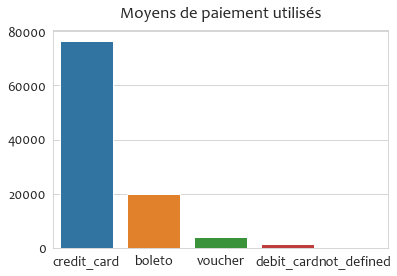

In [204]:
sns.barplot(x=nb_payments_type.sum().index, y=nb_payments_type.sum().values)
plt.title('Moyens de paiement utilisés', y=1.03)
plt.show()

### Paiment en plusieurs fois

In [121]:
orders_customers.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [122]:
payment_install

,pay_plus_fois
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
00018f77f2f0320c557190d7a144bdd3,1
000229ec398224ef6ca0657da4fc703e,1
00024acbcdf0a6daa1e931b038114c75,1
00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...
fffc94f6ce00a00581880bf54a75a037,0
fffcd46ef2263f404302a634eb57f7eb,0
fffce4705a9662cd70adb13d4a31832d,1


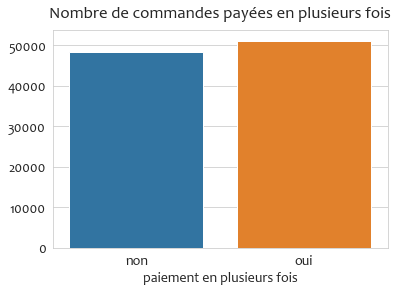

In [216]:
ax = sns.countplot(data=payment_install, x='pay_plus_fois')
ax.set_ylabel('')
ax.set_xlabel('paiement en plusieurs fois')
ax.set_xticklabels(['non', 'oui'])
plt.title('Nombre de commandes payées en plusieurs fois',
          y=1.03)
plt.show()

In [123]:
payments_installment = pd.merge(orders_customers, payment_install,
                                how='left', on='order_id')

payments_installment = payments_installment[['order_id',
                                             'customer_unique_id',
                                             'pay_plus_fois']]

In [124]:
payments_installment = payments_installment.groupby(
    'customer_unique_id').mean()

In [125]:
payments_installment.pay_plus_fois.unique()

array([1.        , 0.        , 0.5       , 0.33333333, 0.75      ,
       0.25      , 0.66666667, 0.6       , 0.4       , 0.71428571,
              nan, 0.23529412])

In [126]:
# faire ressortir les clients qui paient le plus souvent en plusieurs fois
payments_installment = payments_installment.pay_plus_fois.apply(
    lambda x: 1 if x >= 0.5 else 0)

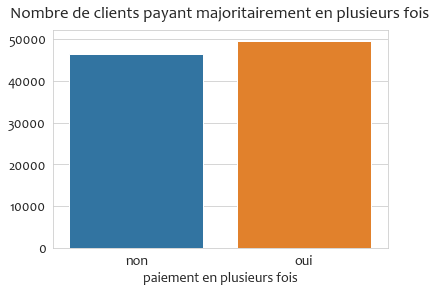

In [221]:
ax = sns.countplot(x=payments_installment)
ax.set_ylabel('')
ax.set_xlabel('paiement en plusieurs fois')
ax.set_xticklabels(['non', 'oui'])
plt.title('Nombre de clients payant majoritairement en plusieurs fois',
          y=1.03)
plt.show()

## Ajout des reviews

In [127]:
orders_reviews = pd.merge(orders_customers, recent_reviews,
                          how='left', on='order_id')
# on ne prend que les avis les plus récent sur chaque commande

orders_reviews.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [128]:
orders_reviews = orders_reviews[['order_id', 'customer_unique_id',
                                 'review_id', 'review_score',
                                 'review_creation_date',
                                 'review_answer_timestamp']]
orders_reviews.head()

,order_id,customer_unique_id,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,8d5266042046a06655c8db133d120ba5,4,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,e50934924e227544ba8246aeb3770dd4,5,2018-02-17 00:00:00,2018-02-18 13:02:51


In [129]:
orders_score = orders_reviews.groupby('customer_unique_id').mean()
orders_score.rename(columns={'review_score': 'mean_review_score'},
                    inplace=True)

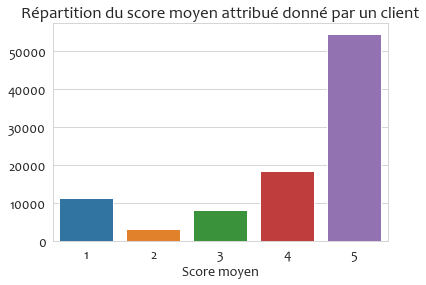

In [130]:
sns.countplot(x=orders_score.mean_review_score,
              order=[1, 2, 3, 4, 5])
plt.ylabel('')
plt.xlabel('Score moyen')
title = plt.title(
    'Répartition du score moyen attribué donné par un client')
# sensiblement identique au score par commande
# la plupart des clients ont une seule commande

In [131]:
orders_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_review_score  96096 non-null  float64
dtypes: float64(1)
memory usage: 3.5+ MB


## Ajout des items

In [132]:
orders_items = pd.merge(orders_customers, items_df, how='left', on='order_id')

In [133]:
orders_items.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [134]:
orders_items = orders_items[['order_id', 'customer_unique_id',
                             'product_id', 'order_item_id', 'seller_id']]

In [135]:
orders_items = pd.merge(orders_items, products_df, how='left', on='product_id')
orders_items.head()

,order_id,customer_unique_id,product_id,order_item_id,seller_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,40.0,268.0,4.0,500.0,19.0,8.0,13.0,home_furniture
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,1.0,289cdb325fb7e7f891c38608bf9e0962,29.0,178.0,1.0,400.0,19.0,13.0,19.0,health_beauty
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,1.0,66922902710d126a0e7d26b0e3805106,59.0,468.0,3.0,450.0,30.0,10.0,20.0,other
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,1.0,2c9e548be18521d1c43cde1c582c6de8,38.0,316.0,4.0,250.0,51.0,15.0,15.0,other


In [136]:
orders_items.drop(['product_weight_g', 'product_length_cm',
                   'product_height_cm', 'product_width_cm'],
                  axis=1, inplace=True)

In [137]:
orders_items.head()

,order_id,customer_unique_id,product_id,order_item_id,seller_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,40.0,268.0,4.0,home_furniture
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,1.0,289cdb325fb7e7f891c38608bf9e0962,29.0,178.0,1.0,health_beauty
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,46.0,232.0,1.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,1.0,66922902710d126a0e7d26b0e3805106,59.0,468.0,3.0,other
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,1.0,2c9e548be18521d1c43cde1c582c6de8,38.0,316.0,4.0,other


In [138]:
orders_items[orders_items.duplicated(subset='customer_unique_id')]

,order_id,customer_unique_id,product_id,order_item_id,seller_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
11,e6ce16cb79ec1d90b1da9085a6118aeb,f2a85dec752b8517b5e58a06ff3cd937,08574b074924071f4e201e151b152b4e,2.0,001cca7ae9ae17fb1caed9dfb1094831,36.0,450.0,1.0,construction
28,acce194856392f074dbf9dada14d8d82,576ea0cab426cd8a00fad9a9c90a4494,9451e630d725c4bb7a5a206b48b99486,2.0,d673a59aac7a70d8b01e6902bf090a11,52.0,300.0,1.0,toys_and_baby
55,9faeb9b2746b9d7526aef5acb08e2aa0,c77154776ead8e798c2d684205938f71,f48eb5c2fde13ca63664f0bb05f55346,2.0,f7ba60f8c3f99e7ee4042fdef03b70c4,60.0,1153.0,2.0,sport
61,66e4624ae69e7dc89bd50222b59f581f,ddf60e20e6e262e2136801ce5cd628b0,b37b72d5a56f887725c2862184b8cab8,2.0,db4350fd57ae30082dec7acbaacc17f9,59.0,566.0,1.0,electronics
69,688052146432ef8253587b930b01a06d,0e764fc1a13e47e900c3d59a989753e8,db56f6d2b04c89eae4daba188842fd7b,2.0,2a84855fd20af891be03bc5924d2b453,56.0,450.0,3.0,fashion_clothing_accessories
...,...,...,...,...,...,...,...,...,...
113396,e8fd20068b9f7e6ec07068bb7537f781,fb9310710003399b031add3e55f34719,0df37da38a30a713453b03053d60d3f7,2.0,218d46b86c1881d022bce9c68a7d4b15,53.0,1105.0,1.0,sport
113401,1b4a0e6b19d0034b531655b41ea89623,39fff7cb5873a7116b02234bd1e6c6dc,9e10ae46a3021a02f1692448ef9fa1db,1.0,8b28d096634035667e8263d57ba3368c,45.0,2231.0,3.0,health_beauty
113409,19dba6d1e58b04e7fc820558a38ea398,9e4accf95024aa6565ca1efcadb96752,0a57f7d2c983bcf8188589a5fea4a8da,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,33.0,932.0,1.0,fashion_clothing_accessories
113416,9115830be804184b91f5c00f6f49f92d,c716cf2b5b86fb24257cffe9e7969df8,49d2e2460386273b195e7e59b43587c3,2.0,1caf283236cd69af44cbc09a0a1e7d32,40.0,180.0,3.0,toys_and_baby


In [139]:
orders_items[orders_items.customer_unique_id ==
             '576ea0cab426cd8a00fad9a9c90a4494']

,order_id,customer_unique_id,product_id,order_item_id,seller_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
27,acce194856392f074dbf9dada14d8d82,576ea0cab426cd8a00fad9a9c90a4494,d70f38e7f79c630f8ea00c993897042c,1.0,977f9f63dd360c2a32ece2f93ad6d306,53.0,233.0,1.0,toys_and_baby
28,acce194856392f074dbf9dada14d8d82,576ea0cab426cd8a00fad9a9c90a4494,9451e630d725c4bb7a5a206b48b99486,2.0,d673a59aac7a70d8b01e6902bf090a11,52.0,300.0,1.0,toys_and_baby


In [140]:
df_test = orders_items.groupby(['customer_unique_id',
                                'product_category_name']).count()

In [141]:
df_test.head()

,,order_id,product_id,order_item_id,seller_id,product_name_lenght,product_description_lenght,product_photos_qty
customer_unique_id,product_category_name,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,home_furniture,1,1,1,1,1,1,1
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,1,1,1,1,1,1,1
0000f46a3911fa3c0805444483337064,other,1,1,1,1,1,1,1
0000f6ccb0745a6a4b88665a16c9f078,electronics,1,1,1,1,1,1,1
0004aac84e0df4da2b147fca70cf8255,electronics,1,1,1,1,1,1,1


In [142]:
df_test.reset_index(level='product_category_name', inplace=True)

In [143]:
df_test[df_test.index.duplicated()]

,product_category_name,order_id,product_id,order_item_id,seller_id,product_name_lenght,product_description_lenght,product_photos_qty
customer_unique_id,,,,,,,,
000fbf0473c10fc1ab6f8d2d286ce20c,toys_and_baby,2,2,2,2,2,2,2
004288347e5e88a27ded2bb23747066c,other,1,1,1,1,1,1,1
004b45ec5c64187465168251cd1c9c2f,home_furniture,1,1,1,1,1,1,1
0058f300f57d7b93c477a131a59b36c3,other,1,1,1,1,1,1,1
0097fca0db567f5ca79509b7b4fc1c2d,other,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
fe59d5878cd80080edbd29b5a0a4e1cf,sport,2,2,2,2,2,2,2
fe81bb32c243a86b2f86fbf053fe6140,other,2,2,2,2,2,2,2
fed519569d16e690df6f89cb99d4e682,toys_and_baby,1,1,1,1,1,1,1


In [144]:
df_test.loc['000fbf0473c10fc1ab6f8d2d286ce20c']

,product_category_name,order_id,product_id,order_item_id,seller_id,product_name_lenght,product_description_lenght,product_photos_qty
customer_unique_id,,,,,,,,
000fbf0473c10fc1ab6f8d2d286ce20c,culture_books_multimedia,2,2,2,2,2,2,2
000fbf0473c10fc1ab6f8d2d286ce20c,toys_and_baby,2,2,2,2,2,2,2


In [145]:
orders_items[orders_items.customer_unique_id ==
             '000fbf0473c10fc1ab6f8d2d286ce20c']

,order_id,customer_unique_id,product_id,order_item_id,seller_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
81647,87440e08790d85796f5b8bc9f5ed2707,000fbf0473c10fc1ab6f8d2d286ce20c,38021cef829efa264df6f9d21c4df6e9,1.0,ce248b21cb2adc36282ede306b7660e5,37.0,182.0,1.0,culture_books_multimedia
81648,87440e08790d85796f5b8bc9f5ed2707,000fbf0473c10fc1ab6f8d2d286ce20c,38021cef829efa264df6f9d21c4df6e9,2.0,ce248b21cb2adc36282ede306b7660e5,37.0,182.0,1.0,culture_books_multimedia
81649,87440e08790d85796f5b8bc9f5ed2707,000fbf0473c10fc1ab6f8d2d286ce20c,d7a3cfa08519494aa1ad181e803617ec,3.0,e53d5b9b29d1218281f4a907ada18626,37.0,512.0,1.0,toys_and_baby
81650,87440e08790d85796f5b8bc9f5ed2707,000fbf0473c10fc1ab6f8d2d286ce20c,d7a3cfa08519494aa1ad181e803617ec,4.0,e53d5b9b29d1218281f4a907ada18626,37.0,512.0,1.0,toys_and_baby


In [146]:
# recup nombre par categorie pour chaque client
df_pivot = df_test.pivot(columns='product_category_name', values='order_id')
df_pivot.fillna(0, inplace=True)
df_pivot.head()

product_category_name,auto,construction,culture_books_multimedia,electronics,fashion_clothing_accessories,food_drinks,health_beauty,home_furniture,other,sport,toys_and_baby
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Ajout information vendeur / distance

In [147]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2


In [148]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP


In [149]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [150]:
orders_dist = orders_df[['order_id', 'customer_id']].copy()

In [151]:
orders_dist = pd.merge(orders_dist, customers_df,
                       how='left', on='customer_id')

In [152]:
orders_dist.head()

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [153]:
orders_dist.rename(columns={'customer_city': 'geolocation_city',
                            'customer_state': 'geolocation_state'},
                   inplace=True)

In [154]:
coord_villes.head()

,,geolocation_lat,geolocation_lng
geolocation_city,geolocation_state,,
* cidade,PR,-25.571748,-49.334374
...arraial do cabo,RJ,-22.969370,-42.029834
4o. centenario,PR,-24.271860,-53.069433
4º centenario,PR,-24.279801,-53.074723
abadia de goias,GO,-16.767063,-49.438089


In [155]:
orders_dist = pd.merge(orders_dist, coord_villes,
                       how='left', on=['geolocation_city',
                                       'geolocation_state'])

In [156]:
orders_dist.head()

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.570860,-46.633242
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.148291,-44.967260
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.745552,-48.514168
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.778635,-35.294131
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.660031,-46.521966


In [157]:
orders_dist['customer_coord'] = orders_dist.apply(
    lambda x: (x['geolocation_lat'], x['geolocation_lng']),
    axis=1)

In [158]:
orders_dist = orders_dist[['order_id', 'customer_unique_id', 'customer_coord']]

In [159]:
orders_dist = pd.merge(orders_dist, items_df[['order_id', 'seller_id']],
                       how='left', on='order_id')

In [160]:
orders_dist = pd.merge(orders_dist, sellers_df.drop('seller_zip_code_prefix',
                                                    axis=1),
                       how='left', on='seller_id')

In [161]:
orders_dist.rename(columns={'seller_city': 'geolocation_city',
                            'seller_state': 'geolocation_state'},
                   inplace=True)

In [162]:
orders_dist = pd.merge(orders_dist, coord_villes,
                       how='left', on=['geolocation_city',
                                       'geolocation_state'])

In [163]:
orders_dist['seller_coord'] = orders_dist.apply(
    lambda x: (x['geolocation_lat'], x['geolocation_lng']), axis=1)

In [164]:
orders_dist.drop(['geolocation_city', 'geolocation_state',
                  'geolocation_lat', 'geolocation_lng'],
                 axis=1, inplace=True)

In [165]:
orders_dist.head()

,order_id,customer_unique_id,customer_coord,seller_id,seller_coord
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,"(-23.570860168123772, -46.63324168698217)",3504c0cb71d7fa48d967e0e4c94d59d9,"(-23.669993795741274, -46.4489086924047)"
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,"(-12.148291440071393, -44.96726006078333)",289cdb325fb7e7f891c38608bf9e0962,"(nan, nan)"
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,"(-16.74555213209521, -48.514168230131915)",4869f7a5dfa277a7dca6462dcf3b52b2,"(-21.36350170979939, -48.22960077888057)"
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,"(-5.778634996688903, -35.29413092468798)",66922902710d126a0e7d26b0e3805106,"(-19.908772138018296, -43.95754937318114)"
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,"(-23.66003109137579, -46.52196585166827)",2c9e548be18521d1c43cde1c582c6de8,"(-23.530401558443817, -46.19388795902843)"


In [166]:
import haversine as hs

In [167]:
orders_dist['distance_km'] = orders_dist.apply(
    lambda x: hs.haversine(x['customer_coord'], x['seller_coord']), axis=1)

In [168]:
# Il y a une ligne par item et potentiellement plusieurs sellers par commande,
# on va grouper par customer/commande/seller
# faire la moyenne sur vendeur, items pour chaque commande,
# on aurala distance pour chaque vendeur des commandes
# puis on fait la moyennes sur la commande
# puis on aura la moyenne sur chaque customer

In [169]:
orders_dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            113425 non-null  object 
 1   customer_unique_id  113425 non-null  object 
 2   customer_coord      113425 non-null  object 
 3   seller_id           112650 non-null  object 
 4   seller_coord        113425 non-null  object 
 5   distance_km         110130 non-null  float64
dtypes: float64(1), object(5)
memory usage: 6.1+ MB


In [170]:
# tout est regroupé pour avoir une ligne par customer/commande/vendeur
mean_orders_dist = orders_dist.groupby(['customer_unique_id',
                                        'order_id', 'seller_id']).mean()
# plus qu'une ligne par customer/commande
mean_orders_dist = mean_orders_dist.groupby(['customer_unique_id',
                                             'order_id']).mean()
# une ligne par customer
mean_orders_dist = mean_orders_dist.groupby(['customer_unique_id']).mean()

In [171]:
mean_orders_dist.head()

,distance_km
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,109.070238
0000b849f77a49e4a4ce2b2a4ca5be3f,16.257268
0000f46a3911fa3c0805444483337064,520.447834
0000f6ccb0745a6a4b88665a16c9f078,2471.204643
0004aac84e0df4da2b147fca70cf8255,154.585974


In [172]:
# graph distrib + outliers ?

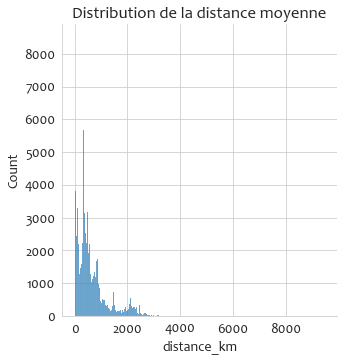

In [173]:
sns.displot(data=mean_orders_dist, x='distance_km')
title = plt.title('Distribution de la distance moyenne')

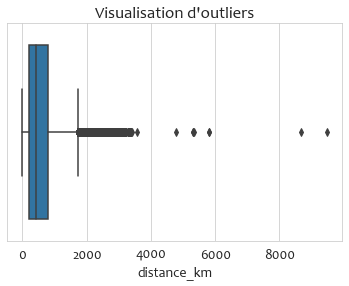

In [174]:
sns.boxplot(data=mean_orders_dist, x='distance_km')
title = plt.title('Visualisation d\'outliers')

In [175]:
# outlier au dessus de 4000km à clean

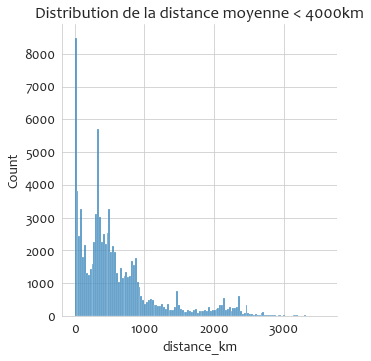

In [176]:
sns.displot(data=mean_orders_dist[mean_orders_dist.distance_km < 4000],
            x='distance_km')
title = plt.title('Distribution de la distance moyenne < 4000km')

# Table customers

In [177]:
customer_explore = customers_df['customer_unique_id'].copy()
customer_explore.drop_duplicates(inplace=True)

In [178]:
customer_explore.head()

0    0000366f3b9a7992bf8c76cfdf3221e2
1    0000b849f77a49e4a4ce2b2a4ca5be3f
2    0000f46a3911fa3c0805444483337064
3    0000f6ccb0745a6a4b88665a16c9f078
4    0004aac84e0df4da2b147fca70cf8255
Name: customer_unique_id, dtype: object

In [179]:
for var in [orders_count, delais, customer_mean,
            orders_score, mean_nb_payments_type,
            nb_payments_type, df_pivot, orders_bf,
            orders_cancel, mean_orders_dist,
            payments_installment]:

    customer_explore = pd.merge(customer_explore, var,
                                how='left', on='customer_unique_id')

In [180]:
customer_explore['plusieurs_commandes'] = customer_explore.nb_commandes.apply(
    lambda x: 1 if x > 1 else 0)

In [181]:
customer_explore.drop('nb_commandes', axis=1, inplace=True)

In [182]:
customer_explore

,customer_unique_id,delay,mean_payment_value,mean_review_score,mean_nb_payment_type,credit_card,boleto,voucher,debit_card,not_defined,...,health_beauty,home_furniture,other,sport,toys_and_baby,bfriday,mean_canceled,distance_km,pay_plus_fois,plusieurs_commandes
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,141.90,5.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0.0,109.070238,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,27.19,4.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0.0,16.257268,0,0
2,0000f46a3911fa3c0805444483337064,0.0,86.22,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,0.0,520.447834,1,0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,43.62,4.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,2471.204643,1,0
4,0004aac84e0df4da2b147fca70cf8255,0.0,196.89,5.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,154.585974,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,2067.42,5.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0,0.0,2002.532482,1,0
96092,fffea47cd6d3cc0a88bd621562a9d061,0.0,84.58,4.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0.0,1524.451623,0,0
96093,ffff371b4d645b6ecea244b27531430a,0.0,112.46,5.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1524.448725,0,0
96094,ffff5962728ec6157033ef9805bacc48,0.0,133.69,5.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,635.837066,1,0


In [183]:
customer_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96096 entries, 0 to 96095
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            96096 non-null  object 
 1   delay                         96096 non-null  float64
 2   mean_payment_value            96095 non-null  float64
 3   mean_review_score             96096 non-null  float64
 4   mean_nb_payment_type          96095 non-null  float64
 5   credit_card                   96096 non-null  float64
 6   boleto                        96096 non-null  float64
 7   voucher                       96096 non-null  float64
 8   debit_card                    96096 non-null  float64
 9   not_defined                   96096 non-null  float64
 10  auto                          94108 non-null  float64
 11  construction                  94108 non-null  float64
 12  culture_books_multimedia      94108 non-null  float64
 13  e

In [184]:
customer_explore.mean_nb_payment_type.unique()

array([1.        , 2.        , 1.5       , 1.33333333, 1.14285714,
       1.25      ,        nan, 1.66666667])

In [185]:
customer_explore[customer_explore.mean_nb_payment_type.isna()]

,customer_unique_id,delay,mean_payment_value,mean_review_score,mean_nb_payment_type,credit_card,boleto,voucher,debit_card,not_defined,...,health_beauty,home_furniture,other,sport,toys_and_baby,bfriday,mean_canceled,distance_km,pay_plus_fois,plusieurs_commandes
49312,830d5b7aaa3b6f1e9ad63703bec97d23,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0,0.0,560.10559,0,0


In [186]:
# outliers
custdrop = customer_explore[customer_explore.mean_payment_value > 5000].index
custdrop2 = customer_explore[customer_explore.distance_km > 4000].index

In [187]:
customer_explore.drop(custdrop, inplace=True)
customer_explore.drop(49312, inplace=True)
customer_explore.drop(custdrop2, inplace=True)

In [188]:
customer_explore_dist = customer_explore.drop(
    customer_explore[customer_explore.distance_km.isna()].index)

In [189]:
for col in ['construction', 'culture_books_multimedia', 'electronics',
            'fashion_clothing_accessories', 'food_drinks', 'health_beauty',
            'home_furniture', 'other', 'sport', 'toys_and_baby']:

    print(all(customer_explore[customer_explore.auto.isna()].index ==
              customer_explore[customer_explore[col].isna()].index))

True
True
True
True
True
True
True
True
True
True


In [190]:
indexsuppr = customer_explore_dist[customer_explore_dist.auto.isna()].index

In [191]:
customer_explore_dist.drop(indexsuppr, inplace=True)

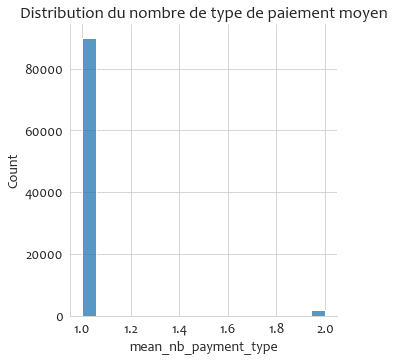

In [192]:
sns.displot(data=customer_explore_dist, x='mean_nb_payment_type')
title = plt.title('Distribution du nombre de type de paiement moyen')

In [193]:
customer_explore_dist[
    'plusieurs_payments_type'
    ] = customer_explore_dist.mean_nb_payment_type.apply(
    lambda x: 1 if x > 1 else 0)
customer_explore_dist.drop('mean_nb_payment_type', axis=1, inplace=True)

In [194]:
customer_explore_dist.to_csv('Data/customers_explore_dist.csv',
                             index=False)

In [195]:
customer_explore_dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92039 entries, 0 to 96095
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            92039 non-null  object 
 1   delay                         92039 non-null  float64
 2   mean_payment_value            92039 non-null  float64
 3   mean_review_score             92039 non-null  float64
 4   credit_card                   92039 non-null  float64
 5   boleto                        92039 non-null  float64
 6   voucher                       92039 non-null  float64
 7   debit_card                    92039 non-null  float64
 8   not_defined                   92039 non-null  float64
 9   auto                          92039 non-null  float64
 10  construction                  92039 non-null  float64
 11  culture_books_multimedia      92039 non-null  float64
 12  electronics                   92039 non-null  float64
 13  f

## par mois

In [196]:
def df_mois_annee(mois, annee):

    orders_mois_annee = orders_df[((orders_df.month <= mois) &
                                   (orders_df.year <= annee)) |
                                  (orders_df.year < annee)]
    customers_df_my = customers_df[customers_df.customer_id.isin(
        orders_mois_annee.customer_id)]

    #############################

    orders_customers_my = pd.merge(orders_mois_annee, customers_df,
                                   how='left', on='customer_id')
    orders_customers_my.drop('customer_id', axis=1, inplace=True)
    orders_count_my = orders_customers_my[['order_id',
                                           'customer_unique_id']].copy()
    orders_count_my = orders_count_my.groupby('customer_unique_id').count()
    orders_count_my.rename(columns={'order_id': 'nb_commandes'},
                           inplace=True)

    #############################

    orders_delay_my = orders_customers_my[['order_id',
                                           'order_purchase_timestamp',
                                           'customer_unique_id']].copy()
    orders_delay_my.sort_values(by=['customer_unique_id',
                                    'order_purchase_timestamp'],
                                inplace=True)
    orders_delay_my.reset_index(drop=True, inplace=True)
    orders_delay_my['previous'] = orders_delay_my.groupby(
        by='customer_unique_id')['order_purchase_timestamp'].shift()
    orders_delay_my['delay'] = orders_delay_my.apply(
        lambda x: x['order_purchase_timestamp'].date() - x['previous'].date()
        if type(x['previous']) != pd._libs.tslibs.nattype.NaTType
        else x['previous'], axis=1)
    orders_delay_my['delay'] = orders_delay_my.delay.dt.days
    orders_delay_my['delay'] = orders_delay_my.delay.apply(
        lambda x: np.nan if x == 0 else x)

    #############################

    delais_my = orders_delay_my.groupby('customer_unique_id').mean()
    delais_my.fillna(0, inplace=True)

    #############################

    orders_bf_my = orders_customers_my[['order_id',
                                        'order_purchase_timestamp',
                                        'customer_unique_id',
                                        'month']].copy()
    orders_bf_my['day'] = orders_bf_my.order_purchase_timestamp.dt.day
    orders_bf_my['bfriday'] = orders_bf_my.apply(
        lambda x: 1 if ((x['month'] == 11) & (x['day'] == 24)) else 0, axis=1)
    orders_bf_my = orders_bf_my.groupby('customer_unique_id').max()
    orders_bf_my = orders_bf_my['bfriday']

    #############################

    orders_cancel_my = orders_customers_my[['order_id',
                                            'order_status',
                                            'customer_unique_id']].copy()
    orders_cancel_my['mean_canceled'] = orders_cancel_my.order_status.apply(
        lambda x: 1 if x == 'canceled' else 0)
    orders_cancel_my = orders_cancel_my.groupby('customer_unique_id').mean()

    #############################

    orders_payments_my = pd.merge(orders_customers_my, payments_orders,
                                  how='left', on='order_id')

    customer_mean_my = orders_payments_my.groupby('customer_unique_id').mean()
    customer_mean_my.drop(['year', 'month', 'customer_zip_code_prefix'],
                          axis=1, inplace=True)
    customer_mean_my.rename(columns={'payment_value': 'mean_payment_value'},
                            inplace=True)

    #############################

    cust_payments_type_my = pd.merge(orders_customers_my, payments_type,
                                     how='left', on='order_id')
    mean_payments_type_my = cust_payments_type_my.groupby(
        'customer_unique_id').mean()
    mean_payments_type_my.rename(columns={'nb_payment_type':
                                          'mean_nb_payment_type'},
                                 inplace=True)
    mean_nb_payments_type_my = mean_payments_type_my['mean_nb_payment_type']

    #############################

    nb_payments_type_my = cust_payments_type_my.groupby(
        'customer_unique_id').sum()
    nb_payments_type_my.drop(['year', 'month',
                              'customer_zip_code_prefix', 'nb_payment_type'],
                             axis=1, inplace=True)

    #############################

    payments_installment_my = pd.merge(orders_customers_my, payment_install,
                                       how='left', on='order_id')
    payments_installment_my = payments_installment_my[['order_id',
                                                       'customer_unique_id',
                                                       'pay_plus_fois']]
    payments_installment_my = payments_installment_my.groupby(
        'customer_unique_id').mean()
    payments_installment_my = payments_installment_my.pay_plus_fois.apply(
        lambda x: 1 if x >= 0.5 else 0)

    #############################

    orders_reviews_my = pd.merge(orders_customers_my, recent_reviews,
                                 how='left', on='order_id')
    orders_reviews_my = orders_reviews_my[['order_id', 'customer_unique_id',
                                           'review_id', 'review_score',
                                           'review_creation_date',
                                           'review_answer_timestamp']]

    orders_score_my = orders_reviews_my.groupby('customer_unique_id').mean()
    orders_score_my.rename(columns={'review_score': 'mean_review_score'},
                           inplace=True)

    #############################

    orders_items_my = pd.merge(orders_customers_my, items_df, how='left',
                               on='order_id')
    orders_items_my = orders_items_my[['order_id', 'customer_unique_id',
                                       'product_id', 'order_item_id',
                                       'seller_id']]
    orders_items_my = pd.merge(orders_items_my, products_df, how='left',
                               on='product_id')
    orders_items_my.drop(['product_weight_g', 'product_length_cm',
                          'product_height_cm', 'product_width_cm'],
                         axis=1, inplace=True)

    df_test_my = orders_items_my.groupby(['customer_unique_id',
                                          'product_category_name']).count()
    df_test_my.reset_index(level='product_category_name', inplace=True)

    df_pivot_my = df_test_my.pivot(columns='product_category_name',
                                   values='order_id')
    df_pivot_my.fillna(0, inplace=True)

    #############################

    orders_dist_my = orders_mois_annee[['order_id', 'customer_id']].copy()
    orders_dist_my = pd.merge(orders_dist_my, customers_df,
                              how='left', on='customer_id')
    orders_dist_my.rename(columns={'customer_city': 'geolocation_city',
                                   'customer_state': 'geolocation_state'},
                          inplace=True)
    orders_dist_my = pd.merge(orders_dist_my, coord_villes,
                              how='left', on=['geolocation_city',
                                              'geolocation_state'])
    orders_dist_my['customer_coord'] = orders_dist_my.apply(
        lambda x: (x['geolocation_lat'], x['geolocation_lng']), axis=1)
    orders_dist_my = orders_dist_my[['order_id', 'customer_unique_id',
                                     'customer_coord']]
    orders_dist_my = pd.merge(orders_dist_my, items_df[['order_id',
                                                        'seller_id']],
                              how='left', on='order_id')
    orders_dist_my = pd.merge(orders_dist_my,
                              sellers_df.drop('seller_zip_code_prefix',
                                              axis=1),
                              how='left', on='seller_id')
    orders_dist_my.rename(columns={'seller_city': 'geolocation_city',
                                   'seller_state': 'geolocation_state'},
                          inplace=True)
    orders_dist_my = pd.merge(orders_dist_my, coord_villes,
                              how='left', on=['geolocation_city',
                                              'geolocation_state'])
    orders_dist_my['seller_coord'] = orders_dist_my.apply(
        lambda x: (x['geolocation_lat'], x['geolocation_lng']), axis=1)
    orders_dist_my.drop(['geolocation_city', 'geolocation_state',
                         'geolocation_lat', 'geolocation_lng'],
                        axis=1, inplace=True)
    orders_dist_my['distance_km'] = orders_dist_my.apply(
        lambda x: hs.haversine(x['customer_coord'], x['seller_coord']), axis=1)

    #############################

    mean_orders_dist_my = orders_dist_my.groupby(['customer_unique_id',
                                                  'order_id',
                                                  'seller_id']).mean()
    mean_orders_dist_my = mean_orders_dist_my.groupby(['customer_unique_id',
                                                       'order_id']).mean()
    mean_orders_dist_my = mean_orders_dist_my.groupby(
        ['customer_unique_id']).mean()

    #############################

    cust_ex_my = customers_df_my['customer_unique_id'].copy()
    cust_ex_my.drop_duplicates(inplace=True)

    for var in [orders_count_my, delais_my, customer_mean_my,
                orders_score_my, mean_nb_payments_type_my,
                nb_payments_type_my, df_pivot_my, orders_bf_my,
                orders_cancel_my, mean_orders_dist_my,
                payments_installment_my]:

        cust_ex_my = pd.merge(cust_ex_my, var,
                              how='left', on='customer_unique_id')
    cust_ex_my['plusieurs_commandes'] = cust_ex_my.nb_commandes.apply(
        lambda x: 1 if x > 1 else 0)
    cust_ex_my.drop('nb_commandes', axis=1, inplace=True)

    custdrop_my = cust_ex_my[cust_ex_my.mean_payment_value > 5000].index
    custdrop2_my = cust_ex_my[cust_ex_my.distance_km > 4000].index

    cust_ex_my.drop(custdrop_my, inplace=True)
    cust_ex_my.drop(custdrop2_my, inplace=True)
    cust_ex_my.drop(cust_ex_my[cust_ex_my.distance_km.isna()].index,
                    inplace=True)
    cust_ex_my.drop(cust_ex_my[cust_ex_my.mean_nb_payment_type.isna()].index,
                    inplace=True)

    indexsuppr = cust_ex_my[cust_ex_my.auto.isna()].index
    cust_ex_my.drop(indexsuppr, inplace=True)

    cust_ex_my['plus_payments_type'] = cust_ex_my.mean_nb_payment_type.apply(
        lambda x: 1 if x > 1 else 0)
    cust_ex_my.drop('mean_nb_payment_type', axis=1, inplace=True)

    cust_ex_my.to_csv('Data/customers_explore_{}_{}.csv'.format(mois, annee),
                      index=False)

In [197]:
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    df_mois_annee(i, 2017)

In [198]:
for i in [1, 2, 3, 4, 5, 6, 7, 8]:

    df_mois_annee(i, 2018)